## Pregunta 6

In [48]:
import numpy as np
import camb
import matplotlib.pyplot as plt

In [100]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
pars.set_matter_power(redshifts=[0], kmax=10)
results = camb.get_results(pars)

In [50]:
pars.set_for_lmax(5000, lens_potential_accuracy=1)
pars.WantTensors= True
pars.WantTransfer = True
results = camb.get_transfer_functions(pars)

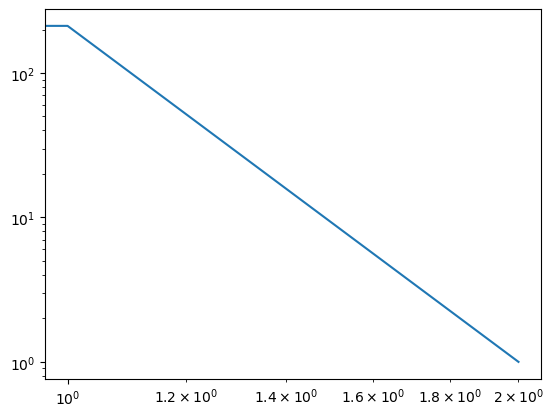

In [110]:
tranfer_func = results.get_matter_transfer_data().transfer_data.shape
plt.loglog(tranfer_func)
plt.show()

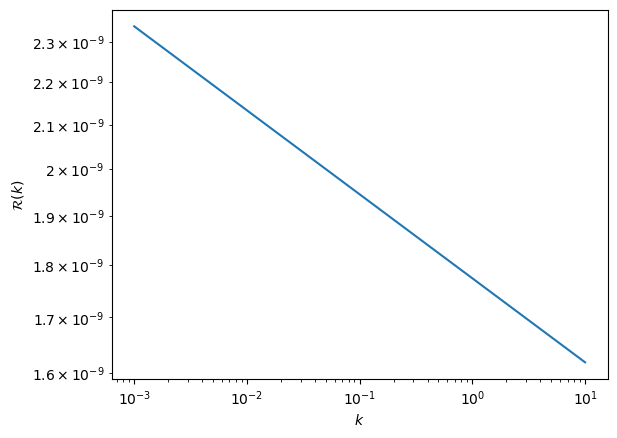

In [90]:

results_inf = camb.model.CAMBparams()
k_list = np.linspace(0.001,10,257)
ps_inf = results_inf.scalar_power(k_list)
plt.loglog(k_list, ps_inf)
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathcal{R}(k)$")
plt.show()

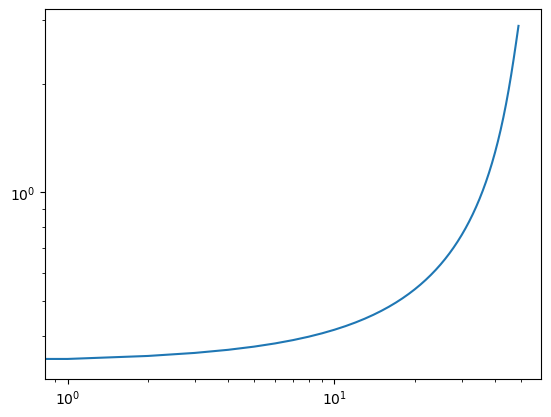

In [97]:
plt.loglog(ps_inf@tranfer_func)

Text(0.5, 0, '$\\ell$')

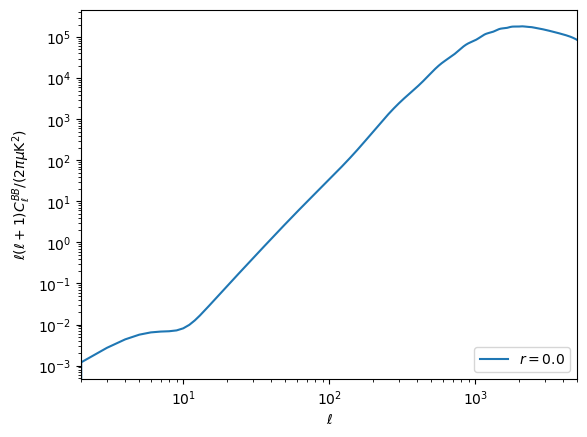

In [72]:
lmax = 5000
rs = np.linspace(0,0.05,3)

inflation_params = camb.initialpower.InitialPowerLaw()
inflation_params.set_params(ns = 0.96, r= 0.01)
results.power_spectra_from_transfer(inflation_params)
cl = results.get_total_cls(lmax, CMB_unit='muK')
plt.loglog(np.arange(lmax+1), np.arange(lmax+1)*(np.arange(lmax+1) +1)*cl[:,2])
plt.xlim([2,lmax])
plt.legend(['$r = %s$' % r for r in rs], loc='lower right')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/ (2\pi \mu{\rm K}^2)$')
plt.xlabel(r'$\ell$')